# Project 3 - Regression
Erin Schick

In [3]:
# Import data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import Timestamp
from ggplot import *
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm
from statsmodels.formula.api import ols

df = pd.read_csv("gapminder.csv")
df.head()

AttributeError: module 'pandas' has no attribute 'tslib'

## Exercise 1:
Make a scatter plot of life expectancy across time.

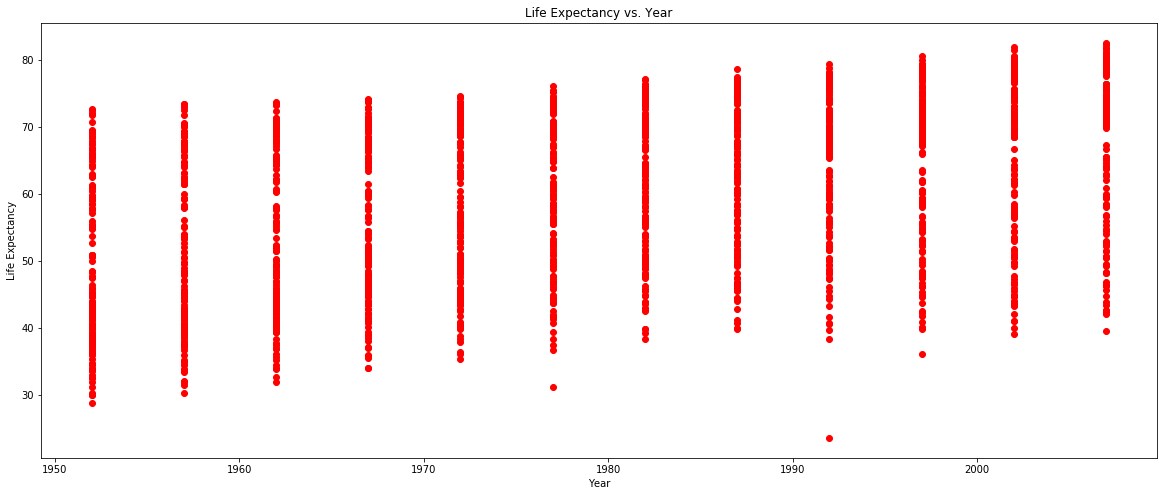

In [2]:
plt.figure(num=None, figsize=(20, 8))
ax = plt.subplot(111)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Year')
plt.plot(df['year'], df['lifeExp'], 'ro')


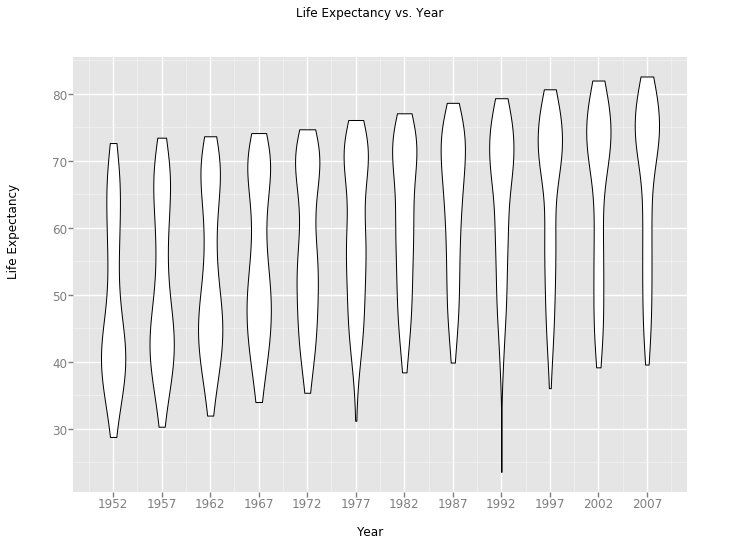

<ggplot: (7550955370)>

In [3]:
ggplot(aes(x='year', y='lifeExp'), data=df) +\
    geom_violin() +\
    labs(title="Life Expectancy vs. Year",
         x = "Year",
         y = "Life Expectancy")


### Question 1: 
Is there a general trend (e.g., increasing or decreasing) for life expectancy across time? Is this trend linear (answering this qualitatively from the plot, you will do a statistical analysis of this question shortly)

Answer: There does seem to be a general trend that the life expectancy increases across time. This can be considered a linear trend because as shown in the graph below, the distribution goes from it being very bottom-heavy to it being more top-heavy.

### Question 2: 
How would you describe the distribution of life expectancy across countries for individual years? Is it skewed, or not? Unimodal or not? Symmetric around its center?

Answer: The distributions of the life expectancy for each country have a trend of increasing (bottom-heavy to top-heavy). In 1977 the graph seems to become more top heavy and continues to be top heavy in years after 1977 and bottome heavy in years below 1977. I would argue that the years 1957 to 1977 are unimodal because it is not clear what the mode is. Years after this seem to be bimodal. Years 1977 and 1992 seem to have a skew to them because there is a sharp tail at the bottom of the plots. Finally, the life expenctancy represented in the graph above is not symmetric about the middle of the graph due to the continuous increasing of the life expenctancy.

### Question 3: 
Suppose I fit a linear regression model of life expectancy vs. year (treating it as a continuous variable), and test for a relationship between year and life expectancy, will you reject the null hypothesis of no relationship? (do this without fitting the model yet. I am testing your intuition.)

Answer: If you consider the increasing trend of life expectancy and years, one would expect to also see a strong relationship between those two variables. However, I would reject the null hypothesis because it seems unlikely that a large sample size like this could have been collected if the null hypothesis was true. I personally see no reason to accept the null hypothesis.

### Question 4: 
What would a violin plot of residuals from the linear model in Question 3 vs. year look like? (Again, don’t do the analysis yet, answer this intuitively)

Answer: The graph should be linear because there is a linear relationship between life expectancy and year. Overall, I would expect for that graph to look similar to the ones above whether it was a scatter plot or violin plot.

### Question 5: 
According to the assumptions of the linear regression model, what should that violin plot look like?

Answer: The graph should be linear and centered around 0 because in a linear regression model you want to figure out a way to best fit your data trends to the observed data and since the violin plot shows data that is linear, I would expect the graph to also be linear and centered around 0.

## Exercise 2: 
Fit a linear regression model using the lm function for life expectancy vs. year (as a continuous variable). Use the broom::tidy to look at the resulting model.

Linear Regression Model: y = 0.32590382763715164x + -585.6521874415445


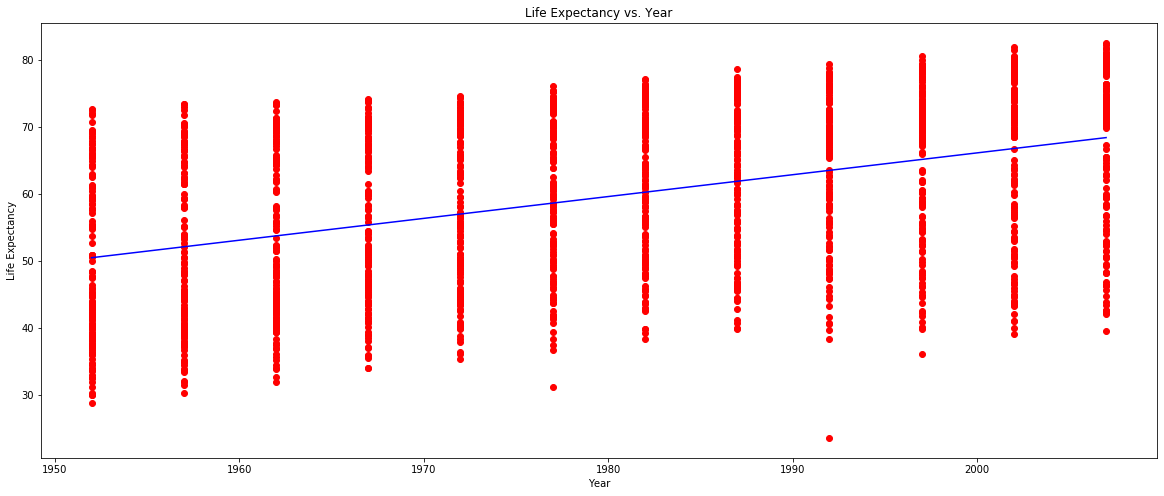

In [4]:
# Find the regression line
X = df[['year']]
Y = df['lifeExp']
lin_reg = LinearRegression()
model = lin_reg.fit(X, Y)
y_prediction = lin_reg.predict(X)

# Plot the graph with the regression line
plt.figure(num=None, figsize=(20, 8))
ax = plt.subplot(111)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs. Year')
plt.plot(df['year'], df['lifeExp'], 'ro')
plt.plot(X, y_prediction, color = 'blue')

# Print the regression model for reference
m = model.coef_[0]
b = model.intercept_
print ("Linear Regression Model: y = {0}x + {1}".format(m, b))


### Question 6: 
On average, by how much does life expectancy increase every year around the world?

Answer: On average, the life expectancy increases by 0.32590382763715164 years every year around the world.

### Question 7: 
Do you reject the null hypothesis of no relationship between year and life expectancy? Why?

In [5]:
# p_val calculation based off of information given at: 
# https://towardsdatascience.com/hypothesis-testing-in-machine-learning-using-python-a0dc89e169ce
model = ols('lifeExp ~ year', data=df).fit()
p_val = model.f_pvalue
p_val


7.54679462559702e-80

Answer: You would reject the null hypothesis because the p_val calculated is much smaller than the threshold given (0.05). 

## Exercise 3: 
Make a violin plot of residuals vs. year for the linear model from Exercise 2 (use the broom::augment function).

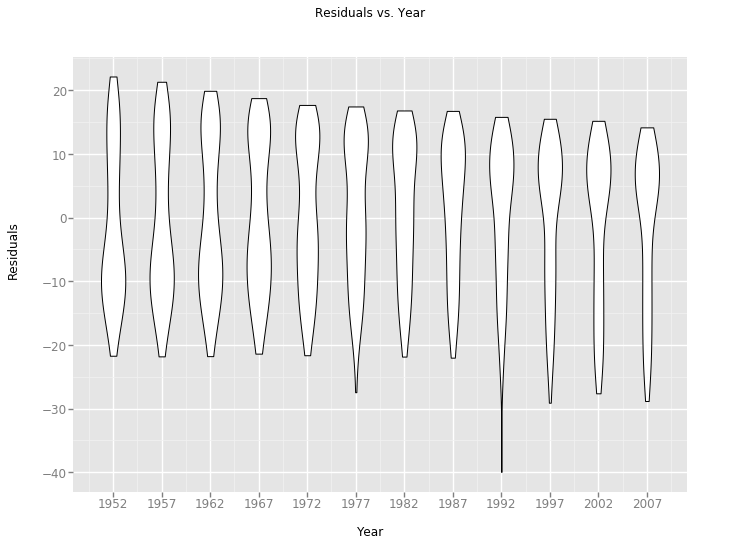

<ggplot: (7552210338)>

In [6]:
# Add the residuals numbers to the dataframe
df['Residuals'] =  df['lifeExp'] - ((df['year'] * m) + b)

# Plot the violin graph
ggplot(aes(x = 'year', y='Residuals'), data=df) +\
    geom_violin() +\
    labs(title="Residuals vs. Year",
         x = "Year",
         y = "Residuals")


### Question 8: 
Does the plot of Exercise 3 match your expectations (as you answered Question 4)?

Answer: My expectations in question 4 ended up being true because the graph above is linear.

## Exercise 4: 
Make a boxplot (or violin plot) of model residuals vs. continent.

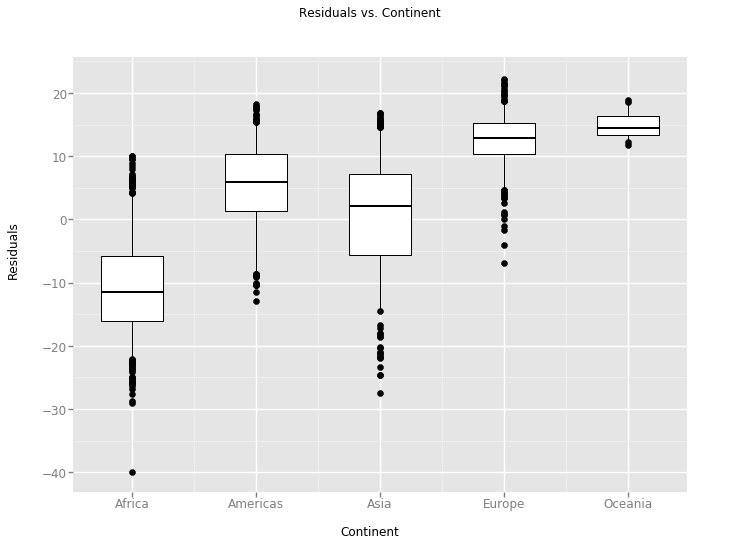

<ggplot: (7552530531)>

In [7]:
# Plot the Box Plot
ggplot(aes(x = 'continent', y='Residuals'), data=df) +\
    geom_boxplot() +\
    labs(title="Residuals vs. Continent",
         x = "Continent",
         y = "Residuals")


### Question 9: 
Is there a dependence between model residual and continent? If so, what would that suggest when performing a regression analysis of life expectancy across time?

Answer: Yes, there is a dependence between model residual and continent because there is a fairly large variation of the residuals for each continent. Therefore, the residuals must be dependent.

## Exercise 5: 
Use geom_smooth(method=lm) in ggplot as part of a scatter plot of life expectancy vs. year, grouped by continent (e.g., using the color aesthetic mapping).

0.28952926304464766


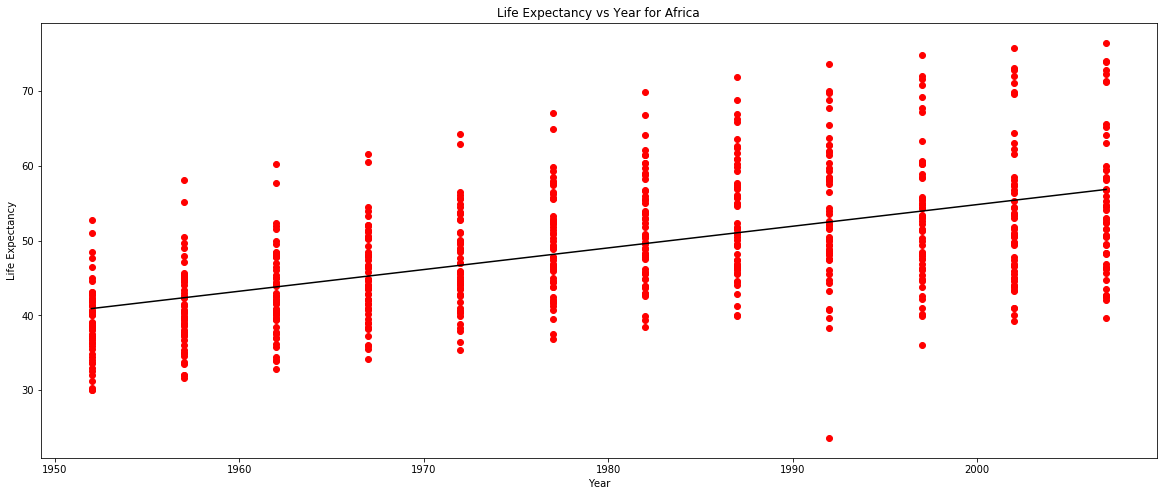

In [8]:
plt.figure(num=None, figsize=(20, 8))
ax = plt.subplot(111)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Year for Africa')

x = []
y = []

# Plotting correct values on plot and emphasizing each point with a red circle
for i in range(0, df.shape[0]) :
    if df.at[i, 'continent'] == 'Africa':
        x.append(df.at[i, 'year'])
        y.append(df.at[i, 'lifeExp'])
        plt.plot(df.at[i, 'year'], df.at[i, 'lifeExp'], 'ro')

# Graph the line of regression
x = np.array(x)
y = np.array(y)

m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, b + m * x, '-', color = 'black')

# Displaying the plot
plt.show()


0.36765093706293583


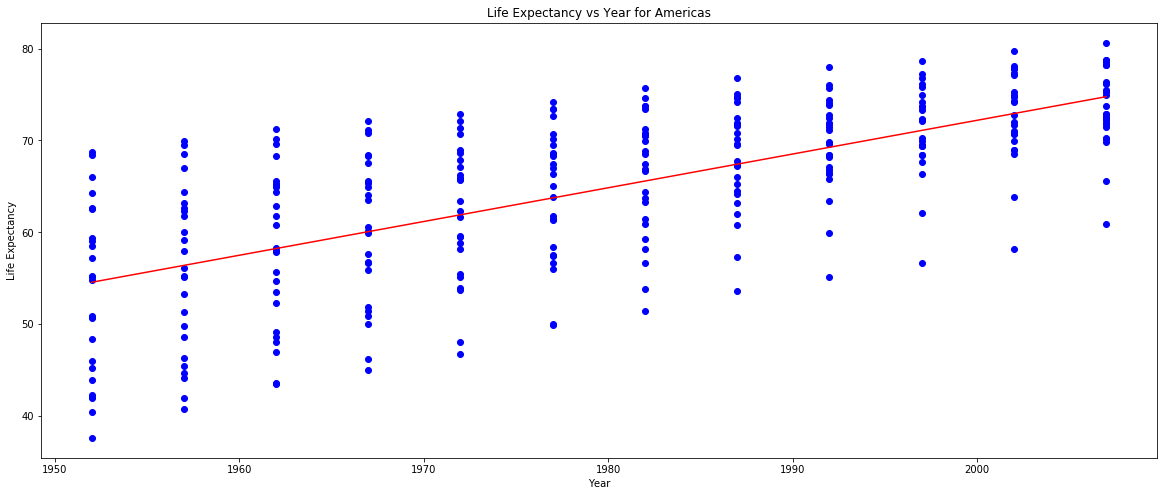

In [9]:
plt.figure(num=None, figsize=(20, 8))
ax = plt.subplot(111)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Year for Americas')

x = []
y = []

# Plotting correct values on plot and emphasizing each point with a blue circle
for i in range(0, df.shape[0]) :
    if df.at[i, 'continent'] == 'Americas':
        x.append(df.at[i, 'year'])
        y.append(df.at[i, 'lifeExp'])
        plt.plot(df.at[i, 'year'], df.at[i, 'lifeExp'], 'bo')

# Graph the line of regression
x = np.array(x)
y = np.array(y)

m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, b + m * x, '-', color = 'red')

# Displaying the plot
plt.show()


0.4531224038991303


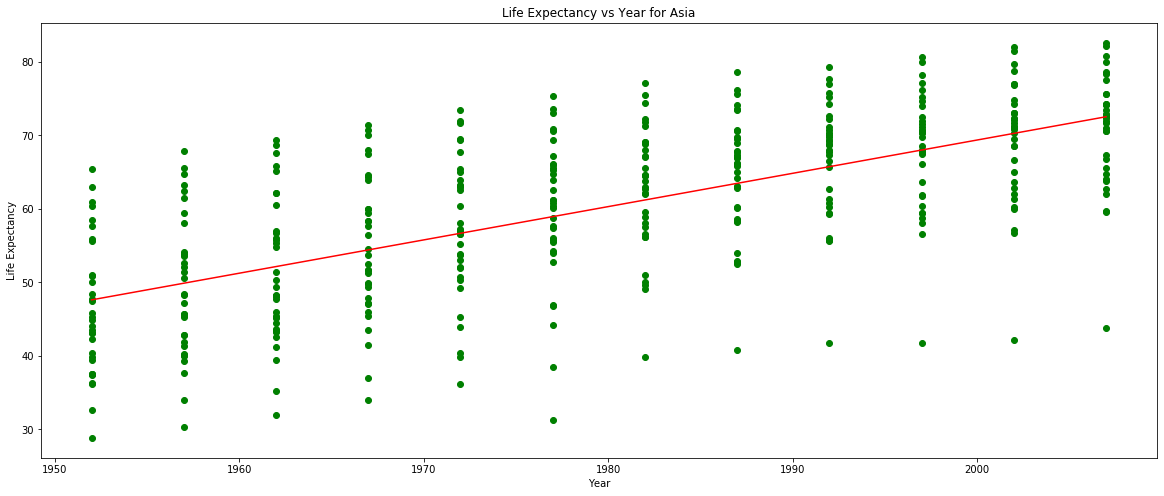

In [10]:
plt.figure(num=None, figsize=(20, 8))
ax = plt.subplot(111)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Year for Asia')

x = []
y = []

# Plotting correct values on plot and emphasizing each point with a green circle
for i in range(0, df.shape[0]) :
    if df.at[i, 'continent'] == 'Asia':
        x.append(df.at[i, 'year'])
        y.append(df.at[i, 'lifeExp'])
        plt.plot(df.at[i, 'year'], df.at[i, 'lifeExp'], 'go')

# Graph the line of regression
x = np.array(x)
y = np.array(y)

m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, b + m * x, '-', color = 'red')

# Displaying the plot
plt.show()


0.2219321445221447


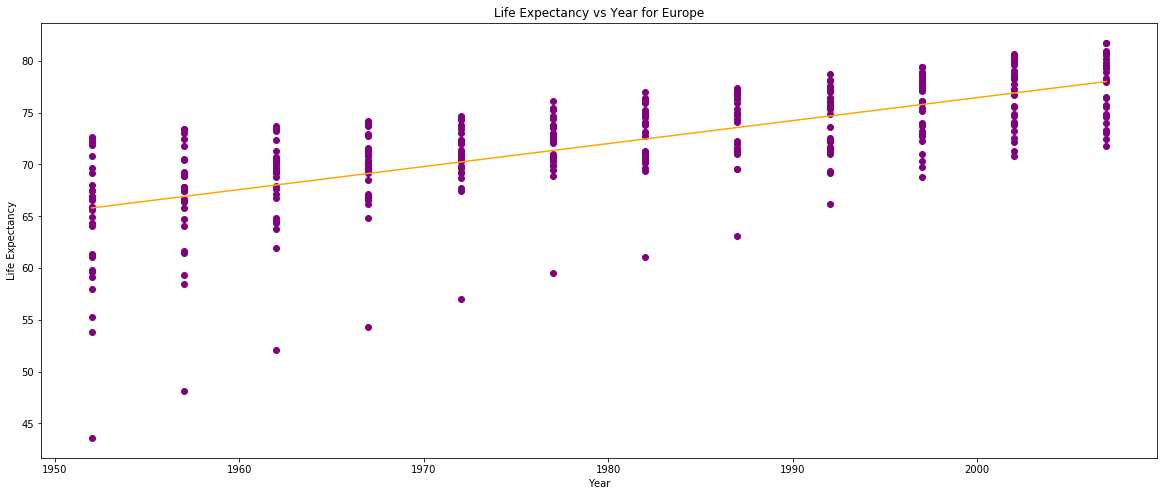

In [11]:
plt.figure(num=None, figsize=(20, 8))
ax = plt.subplot(111)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Year for Europe')

x = []
y = []

# Plotting correct values on plot and emphasizing each point with a purple circle
for i in range(0, df.shape[0]) :
    if df.at[i, 'continent'] == 'Europe':
        x.append(df.at[i, 'year'])
        y.append(df.at[i, 'lifeExp'])
        plt.plot(df.at[i, 'year'], df.at[i, 'lifeExp'], 'o', color = 'purple')

# Graph the line of regression
x = np.array(x)
y = np.array(y)

m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, b + m * x, '-', color = 'orange')

# Displaying the plot
plt.show()


0.21027237762237772


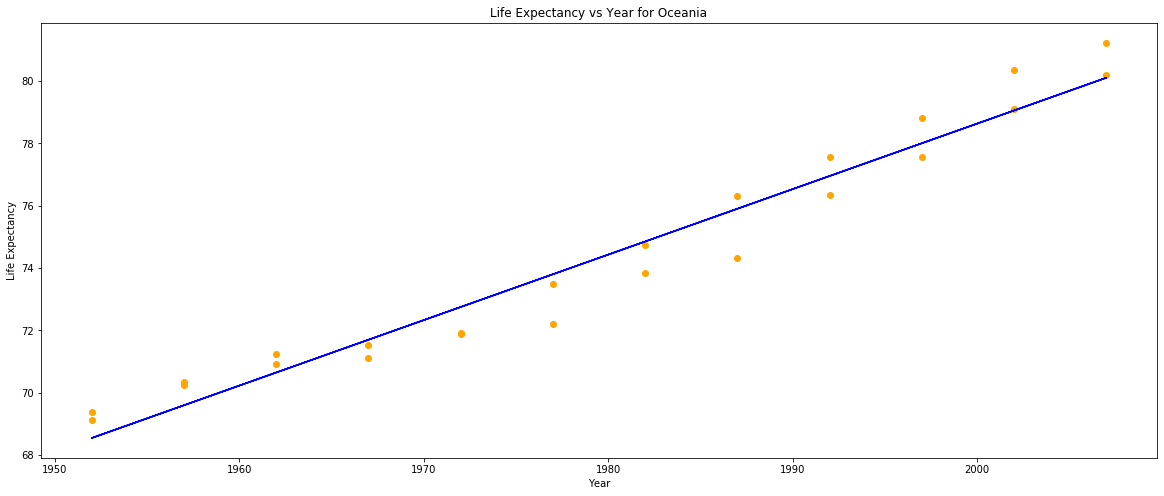

In [12]:
plt.figure(num=None, figsize=(20, 8))
ax = plt.subplot(111)
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.title('Life Expectancy vs Year for Oceania')

x = []
y = []

# Plotting correct values on plot and emphasizing each point with a orange circle
for i in range(0, df.shape[0]) :
    if df.at[i, 'continent'] == 'Oceania':
        x.append(df.at[i, 'year'])
        y.append(df.at[i, 'lifeExp'])
        plt.plot(df.at[i, 'year'], df.at[i, 'lifeExp'], 'o', color = 'orange')

# Graph the line of regression
x = np.array(x)
y = np.array(y)

m, b = np.polyfit(x, y, 1)
print(m)
plt.plot(x, b + m * x, '-', color = 'blue')

# Displaying the plot
plt.show()


### Question 10: 
Based on this plot, should your regression model include an interaction term for continent and year? Why?

Answer: Yes, we should include an interaction term for continent and year based on this plot because the slopes for each line of best fit for every graph is different. Taking into account these differences would create a more accurate regression model down the line.

## Exercise 6: 
Fit a linear regression model for life expectancy including a term for an interaction between continent and year. Use the broom::tidy function to show the resulting model.

In [13]:
fit = sm.ols(formula="lifeExp ~ continent*year", data=df).fit()
print(fit.summary())


                            OLS Regression Results                            
Dep. Variable:                lifeExp   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.691
Method:                 Least Squares   F-statistic:                     424.3
Date:                Wed, 15 Apr 2020   Prob (F-statistic):               0.00
Time:                        17:27:13   Log-Likelihood:                -5771.9
No. Observations:                1704   AIC:                         1.156e+04
Df Residuals:                    1694   BIC:                         1.162e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

### Question 11: 
Are all parameters in the model significantly different from zero? If not, which are not significantly different from zero?

Answer: All of the parameters are very very close to zero except for Oceania which is bigger than the threshold of 0.05. Overall, it is not too far away from 0 but less similar to 0 than the other parameters.

### Question 12: 
On average, by how much does life expectancy increase each year for each continent? (Provide code to answer this question by extracting relevant estimates from model fit)

Answer: The dataframe below extracts the life expectancy increase each year for each continent. These coefficients represent how much the life expectancy increases each year for each continent.
Formula for estimate is year_coefficient + continent_coefficient

In [14]:
# Get the parameters from above
x = fit.params

# Create the coefficient variables for calculations
year_coefficient = x.get(key = 'year') 
americas_coefficient = x.get(key = 'continent[T.Americas]:year')
asia_coefficient = x.get(key = 'continent[T.Asia]:year')
europe_coefficient = x.get(key = 'continent[T.Europe]:year')
oceania_coefficient = x.get(key = 'continent[T.Oceania]:year')

# Populate the dataframe
info = [['Afica', year_coefficient], ['Americas', (year_coefficient + americas_coefficient)], ['Asia', (year_coefficient + asia_coefficient)], ['Europe', (year_coefficient + europe_coefficient)], ['Oceania', (year_coefficient + oceania_coefficient)]] 
  
# Create the pandas DataFrame 
coeff_df = pd.DataFrame(info, columns = ['Continent', 'Coefficient']) 

coeff_df


,Continent,Coefficient
0,Afica,0.289529
1,Americas,0.367651
2,Asia,0.453122
3,Europe,0.221932
4,Oceania,0.210272


## Exercise 7: 
Make a residuals vs. year violin plot for the interaction model. Comment on how well it matches assumptions of the linear regression model. Do the same for a residuals vs. fitted values model.

Answer: The violin plot below matches the assumptions of the linear regression model very well because you can see that the graph is centered around zero, is close to symmetrical, and because it seems to be unimodal.

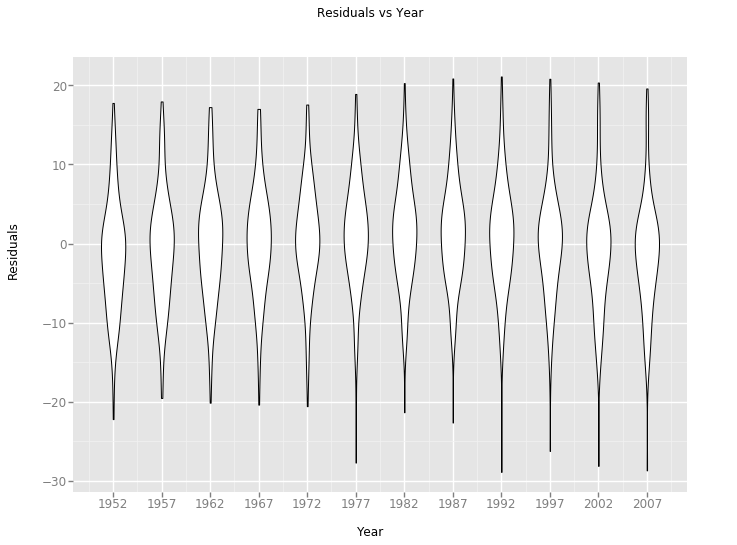

<ggplot: (7553569835)>

In [15]:
# Add the residual numbers to a new dataframe
res2 = pd.DataFrame({'Year': df["year"].values, 'Residuals': (df["lifeExp"].values - fit.fittedvalues)})

# Plot the violin graph
ggplot(aes(x='Year', y='Residuals'), data = res2) +\
    geom_violin() +\
    labs(title="Residuals vs Year",
         x = "Year",
         y = "Residuals")


Answer: The scatter plot below does not match the assumptions of the linear regression model very well because you can see that the graph is not really centered around zero, is not symmetrical, and because it does not seem to be unimodal.

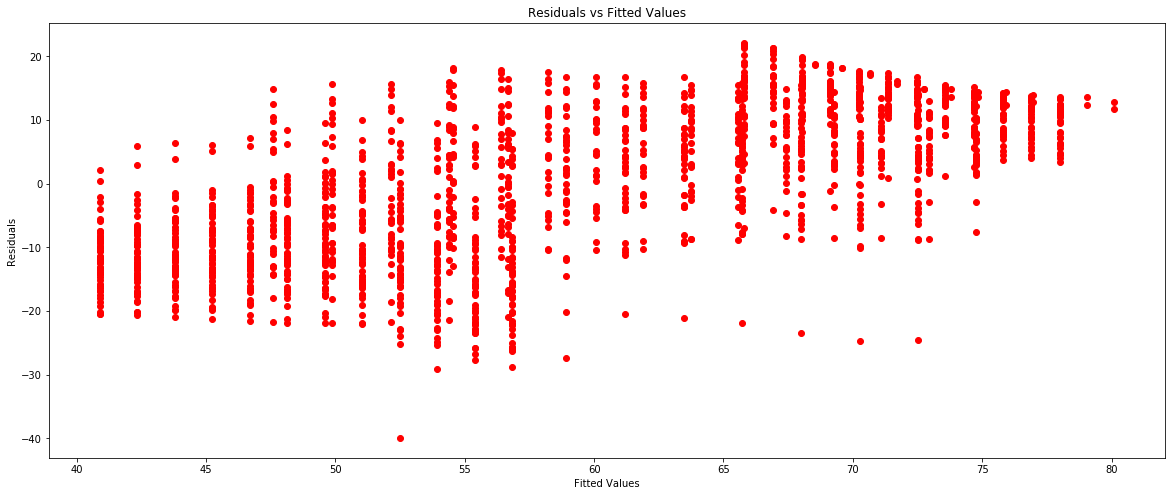

In [16]:
plt.figure(num=None, figsize=(20, 8))
ax = plt.subplot(111)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values')
plt.plot(fit.fittedvalues, df['Residuals'], 'ro')
